# Networkx

用NetworkX进行复杂网络拓扑结构统计指标计算、典型复杂网络建模（随机图、小世界、无标度等）以及复杂网络可视化的方法等

1. [社交网络Networkx库分析人物关系](https://blog.csdn.net/Eastmount/article/details/78452581)
2. [复杂网络分析及Networkx学习](https://blog.csdn.net/Together_CZ/article/details/71250177)

## 1. 案例-使用Networkx分析人物关系

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

['A', 'D', 'B', 'E', 'C']
[('A', 'C'), ('A', 'D'), ('A', 'B'), ('D', 'A'), ('E', 'A'), ('E', 'D')]


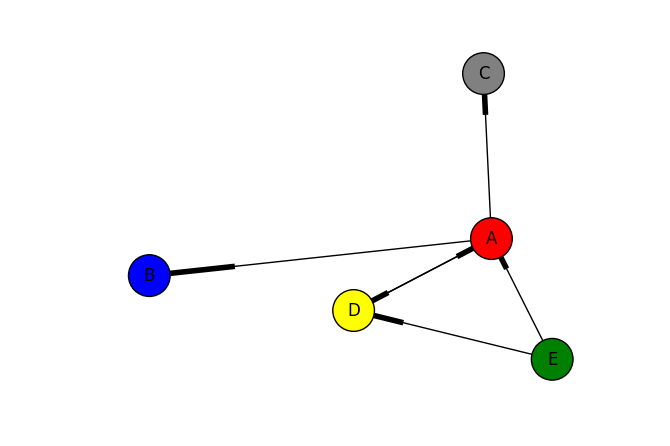

{'A': 0.3333333333333333, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0}

In [44]:
# 绘制第一个网络图

# 1. 定义有向图
DG = nx.DiGraph()

# 2. 添加五个节点
DG.add_nodes_from(["A", "B", "C", "D", "E"])
print(DG.nodes())

# 3. 添加边
DG.add_edges_from([("A", "B"), ("A", "C"), ("A", "D"), ("D", "A"), ("E", "A"), ("E", "D")])
print(DG.edges())

# 4. 绘制图形 设置节点显示颜色a
colors = ["red", "yellow", "blue", "green", "gray"]
nx.draw(DG, with_labels=True, node_size=900, node_color=colors)
plt.show()

# 5. 基本函数
nx.shortest_path(DG, "E", "C")
nx.shortest_path_length(DG, "E", "C")
# nx.diameter(DG)
# nx.radius(DG)
nx.degree(DG)
nx.closeness_centrality(DG)
nx.betweenness_centrality(DG)

In [28]:
nx.shortest_path?

In [3]:
nx.draw?

## 2. Networkx基础
1. 创建图
  
  > Networkx可以创建4类图：
  
    - 有多重边 - 无向图 Graph
    - 无多重边 - 无向图 Graph
    - 有多重边 - 有向图 DiGraph
    - 无多重边 - 有向图 DiGraph
2. 增加点 add_nodes_from
3. 增加边 add_edges_from
   
   增加带权重的边 add_weighted_edges_from
   
4. 访问点和边
    - DG.nodes() # 访问点
    - DG.edges() # 访问边
    - DG.node["A"] # 访问包含点的边列表
    - DG.edge["A"]["B"] # 返回包含两个key之间的边
    
5. 查看点和边的数量
    - DG.number_of_nodes()
    - DG.number_of_edges()
    - DG.neighbor("A") # 所有与A连通的点
    - DG["A"] # 所有与A相连的边的信息
    
6. 设置属性

  > 可以给图、点、边赋予各种属性，其中权重属性最为常见，如权值、频率

    - DG.add_weighted_edges_from([("A", "B", 2.5)])   # 给边赋权值
    - DG.add_node("A", time = '5s')
    - DG.add_nodes_from(["A", "B", "C"], time='5s')
    - DG.add_nodes_from([("A", {"time":"5s"}), ("D",{"time":"6s"})])
    - DG.add_edges_from([("A", "E"), ("E", "A")], color = "red")
7. 绘图

  > nx.draw(DG, with_labels = True, node_size = 900, node_color = colors)

8. 内置函数

  - DFS
  - BFS 
  - 最短路
  - 最小生成树
  - 最大流

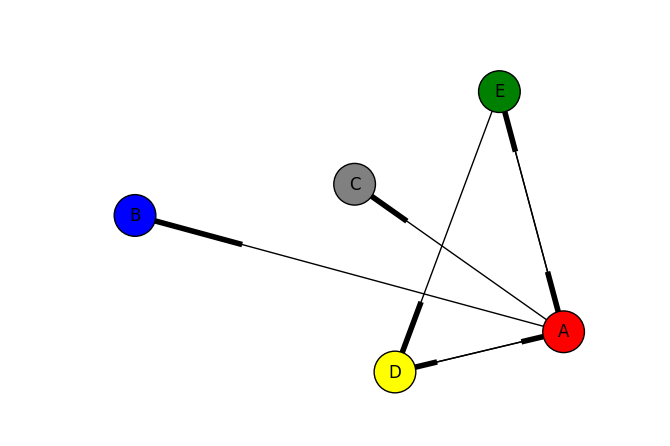

{'weight': 2.5}


In [4]:
DG.add_nodes_from([("A", {"time":"5s"}), ("D", {"time":"6s"})])
DG.add_edges_from([("A", "E"), ("E", "A")], color = "red")
DG.add_weighted_edges_from([("A", "B", 2.5)])
nx.draw(DG, with_labels=True, node_size=900, node_color=colors)
plt.show()
print(DG.edge["A"]["B"])

## 3. 案例 - 人物关系网络分析(国家奖学金获得者)

> 数据来源，[点这里](http://www.moe.gov.cn/srcsite/A05/s7505/201711/t20171108_318697.html)

1. 与参考文献1类似，以学校作为关联节点
2. 计算出各个学生的共现矩阵(同一个学校的学生，视为共现，权重为1)，分析不同学校的学生关系
3. 共现矩阵依下列数据格式出现： A学生 B学生 权重

In [55]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
%matplotlib inline

In [6]:
df = pd.read_excel(r"data\1.networkx_清华大学国家奖学金获奖名单.xls"
                   , skiprows = 1
                   , names = ["seq", "name", "univ", "school", "major", "id_stu", "gender", "ration", "dt_roll", "id_certficate"]
                  )
df["name"] = df.name.apply(lambda x:x.replace(" ", ""))

ds = df.sample(n=50)
ds.reset_index(drop=True, inplace=True)
# ds量太大，随机抽样，生成新样本

ds.head(10)

,seq,name,univ,school,major,id_stu,gender,ration,dt_roll,id_certficate
0,143,吴睿涵,清华大学,交叉信息院,计算机科学与技术,2014012716,女,汉族,2014.08,514
1,38,王广晗,清华大学,精仪系,测控技术与仪器,2016010564,男,汉族,2016.08,409
2,172,杨雨佳,清华大学,人文学院,哲学,2015012807,女,汉族,2015.08,543
3,9,崔朝阳,清华大学,建筑学院,建筑学,2016010086,女,汉族,2016.08,380
4,34,袁帅,清华大学,机械系,机械工程（实验班）,2016010536,男,汉族,2016.08,405
5,106,刘恒杰,清华大学,工物系,能源实验班,2014011772,男,汉族,2014.08,477
6,67,王思宇,清华大学,电子系,电子信息类,2015011034,男,汉族,2015.08,438
7,139,张硕文,清华大学,生命学院,医学实验班,2015012390,男,汉族,2015.08,510
8,118,龙雨,清华大学,材料学院,材料科学与工程,2014012008,女,汉族,2014.08,489
9,198,杨维铠,清华大学,软件学院,软件工程,2015011888,男,汉族,2015.08,569


In [7]:
list(ds.school.unique())

['交叉信息院',
 '精仪系',
 '人文学院',
 '建筑学院',
 '机械系',
 '工物系',
 '电子系',
 '生命学院',
 '材料学院',
 '软件学院',
 '汽车系',
 '土木系',
 '化工系',
 '自动化系',
 '经管学院',
 '新闻学院',
 '化学系',
 '航院',
 '电机系',
 '美术学院',
 '数学系',
 '法学院',
 '计算机系',
 '水利系']

In [15]:
%%time
# 以学生姓名作为节点名称

names = list(ds.name)

# 初始化共现矩阵
vector_univ = np.zeros([len(names), len(names)])
print(vector_univ.shape)

# 为学校共现矩阵赋值，并输出之

f = open(r"data\1.networkx_cocurrence.csv", "w", encoding="utf-8")

for i in range(len(names)):
    for j in range(i+1, len(names)):
        if ds.loc[i, "school"] == ds.loc[j, "school"]:
            vector_univ[i, j] += 1
#             vector_univ[j, i] += 1
            f.write("%s, %s, %d\n" %(names[i], names[j], vector_univ[i, j]))
#             f.write("%s, %s, %d" %(ds.loc[j, "univ"], ds.loc[i, "univ"], vector_univ[j, i]))
f.close()    
# 输出共现节点和权重
# 由于这里，对于一个学生来说，有且只有一行，所以，只会匹配一次，所以，直接在上面将数据保存了


# 图形生成
f = open(r"data\1.networkx_cocurrence.csv", "r", encoding="utf-8") # 使用pd读入会更简单

node_a = []
node_b = []
w = []

while(True):
    line = f.readline()
    
    if line == "":
        break
    
    a, b, ww = line.split(",")
    node_a.append(a)
    node_b.append(b)
    w.append(ww)
f.close()

elem_dict = tuple(zip(node_a, node_b))

(50, 50)
Wall time: 640 ms


In [54]:
nx.draw_networkx_labels?

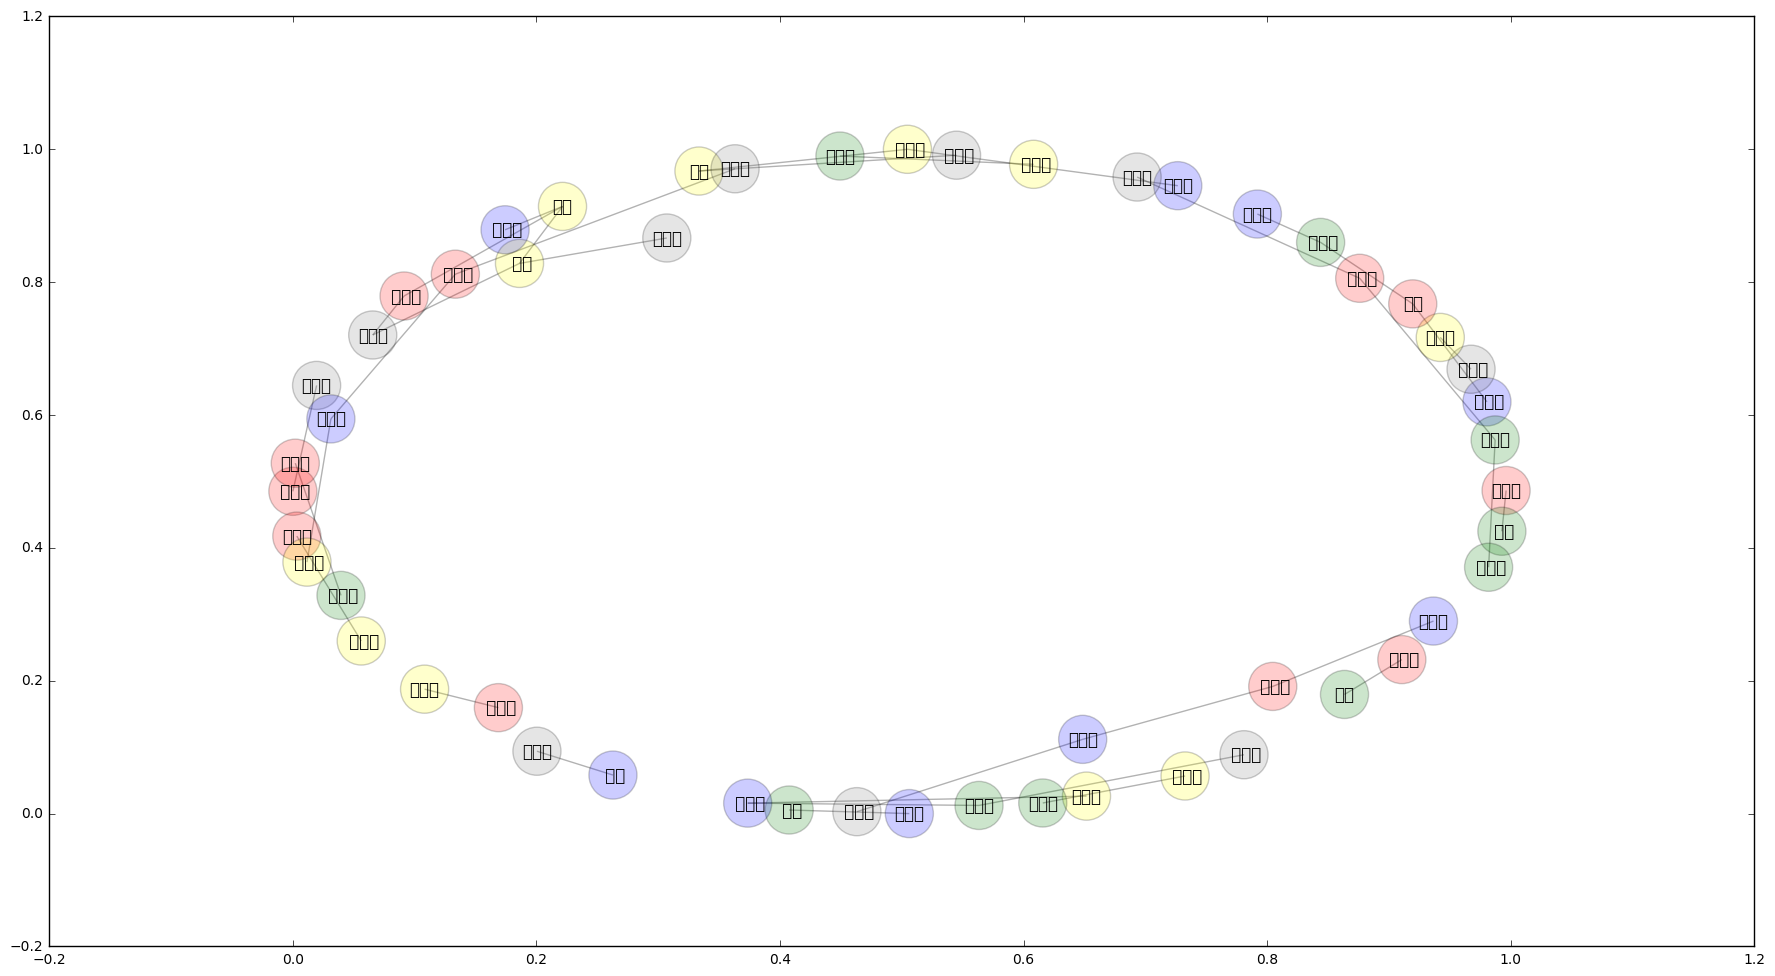

Wall time: 745 ms


In [65]:
%%time
# 生成无向图
NG = nx.Graph()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(22, 12))
NG.add_edges_from(list(elem_dict))
pos = nx.spring_layout(NG,iterations=50)
nx.draw_networkx_nodes(NG, pos, alpha = 0.2, node_size=1200, node_color=colors)
nx.draw_networkx_edges(NG, pos, node_color = "r", alpha = 0.3)
nx.draw_networkx_labels(NG, pos, font_family="sans-serif", alpha=0.5)
plt.show()

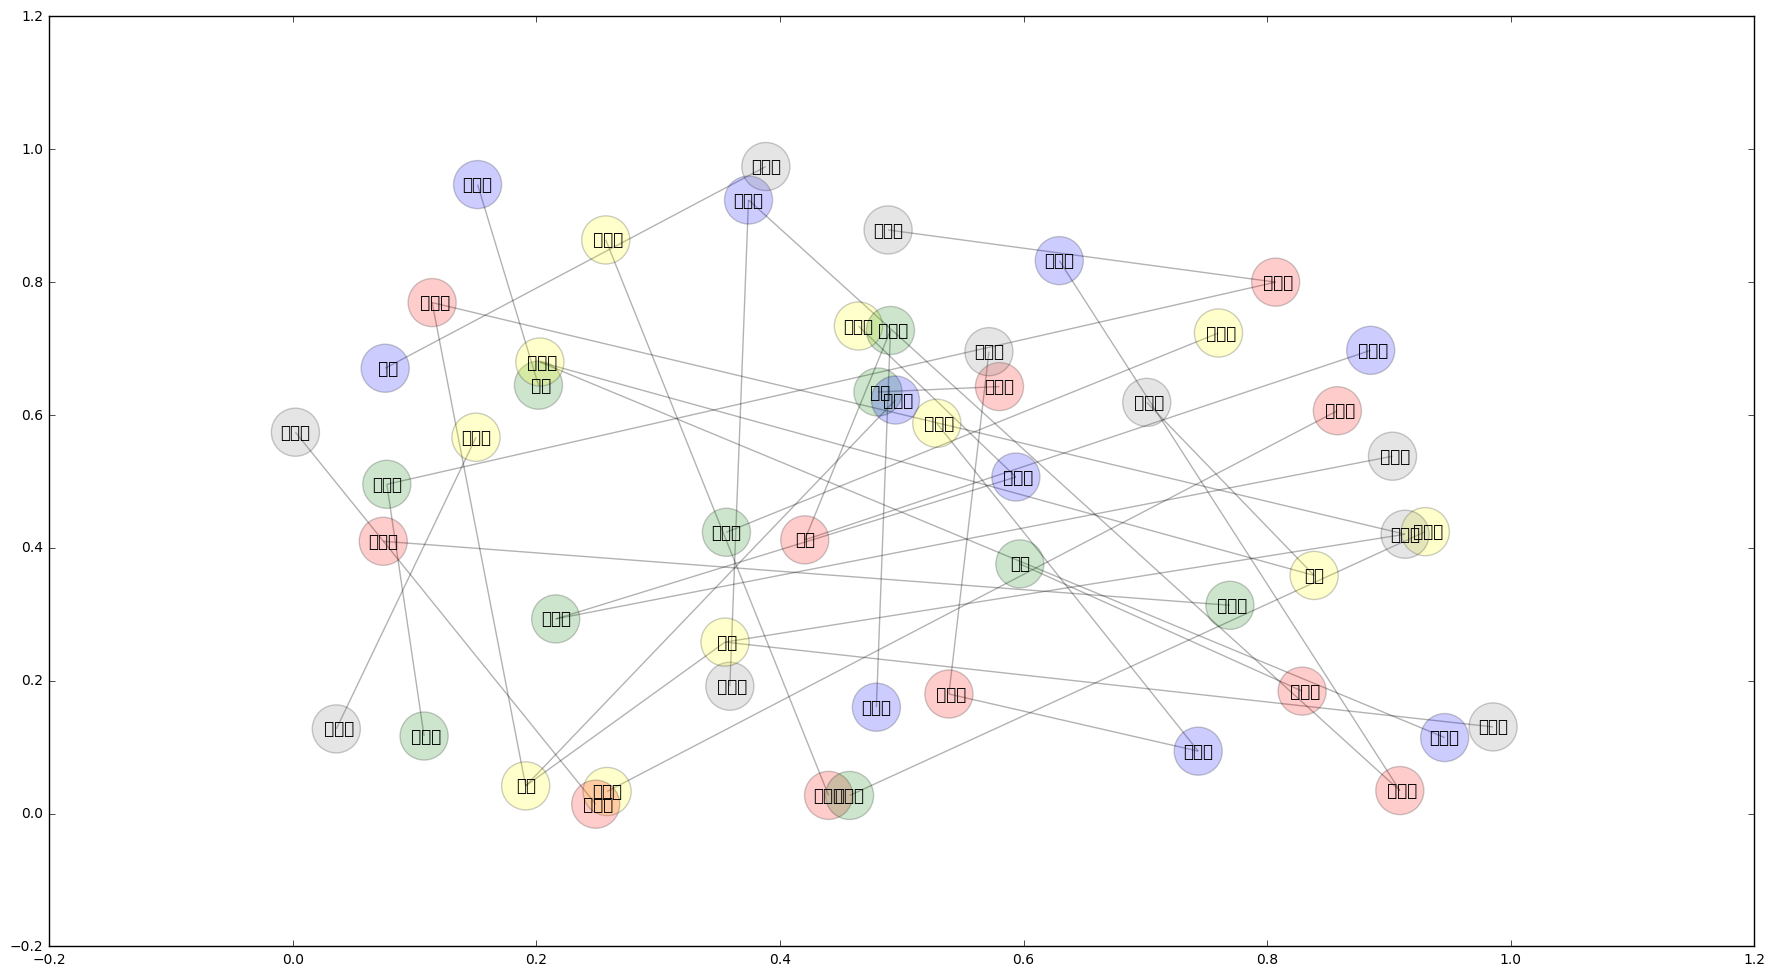

Wall time: 733 ms


In [62]:
%%time
pos = nx.random_layout(NG)
plt.figure(figsize=(22, 12))
nx.draw_networkx_nodes(NG, pos, alpha = 0.2, node_size=1200, node_color=colors)
nx.draw_networkx_edges(NG, pos, node_color = "r", alpha = 0.3)
nx.draw_networkx_labels(NG, pos, font_family="sans-serif", alpha=0.5)
plt.show()

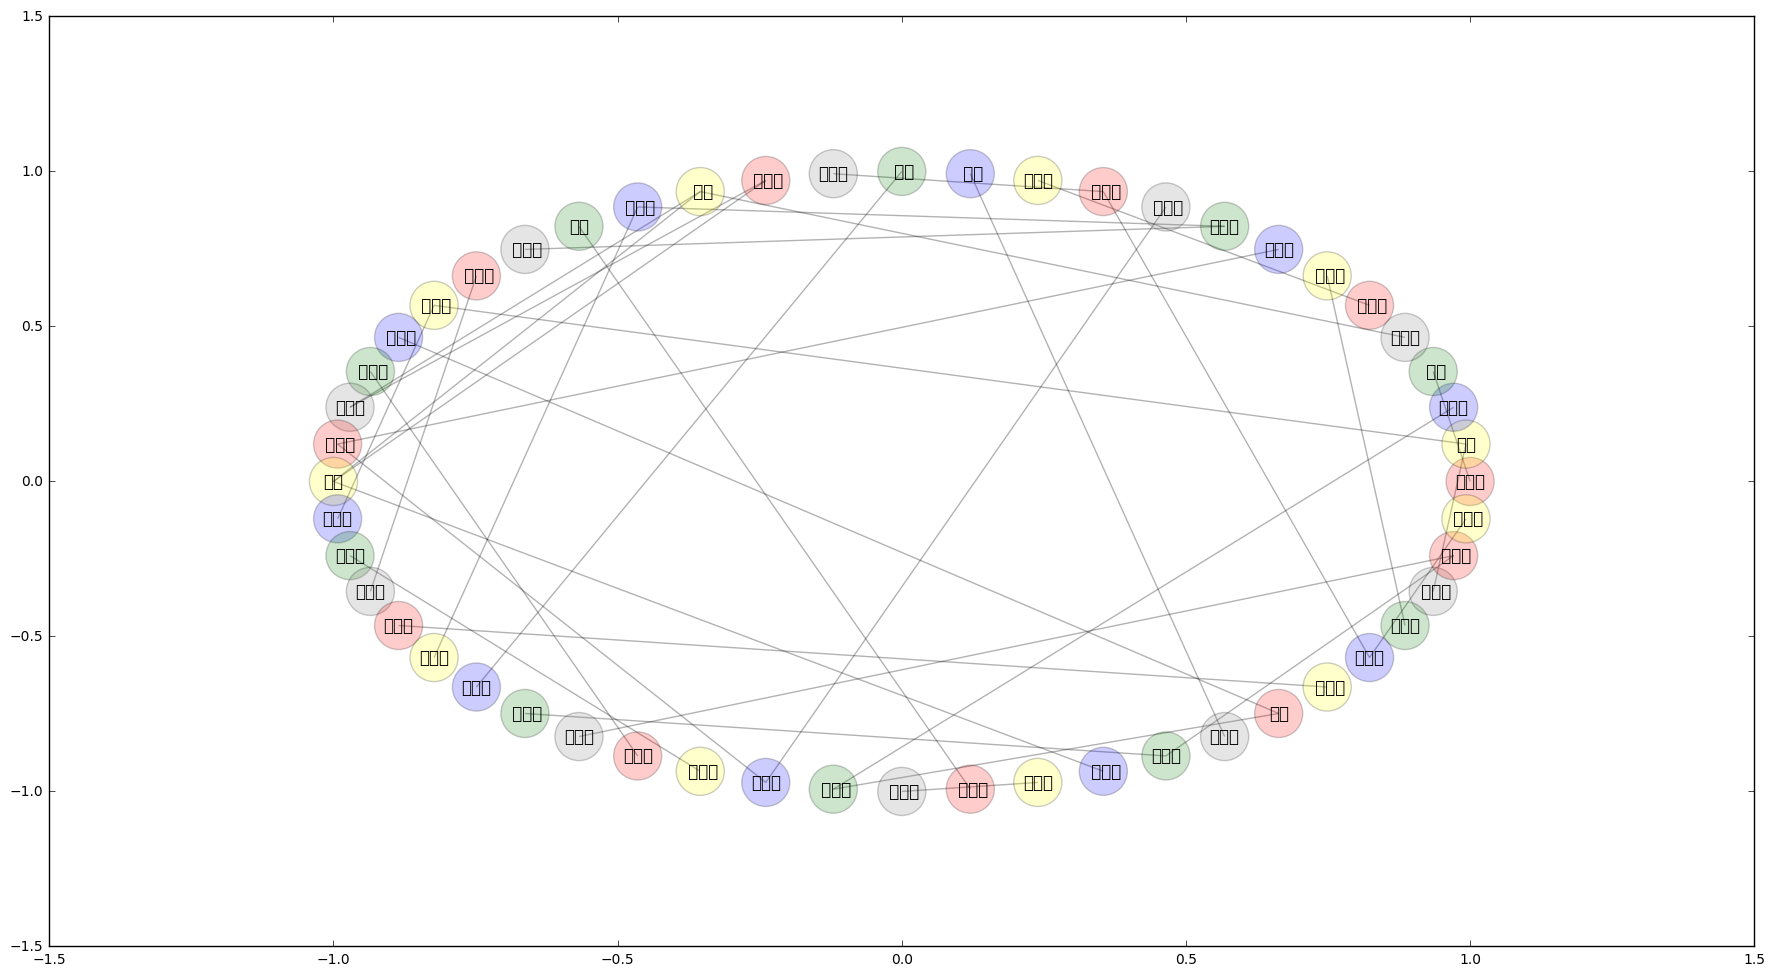

Wall time: 753 ms


In [60]:
%%time
pos = nx.circular_layout(NG)
plt.figure(figsize=(22, 12))
nx.draw_networkx_nodes(NG, pos, alpha = 0.2, node_size=1200, node_color=colors)
nx.draw_networkx_edges(NG, pos, node_color = "r", alpha = 0.3)
nx.draw_networkx_labels(NG, pos, font_family="sans-serif", alpha=0.5)
plt.show()

In [20]:
nx.info(NG)

'Name: \nType: Graph\nNumber of nodes: 52\nNumber of edges: 35\nAverage degree:   1.3462'

In [21]:
nx.density(NG)

0.026395173453996983

In [22]:
NG.number_of_edges()

35

In [23]:
NG.number_of_selfloops()

0

In [46]:
# print("radius: %d" % nx.radius(NG))
# print("diameter: %d" % nx.diameter(NG))
print("eccentricity: %s" % nx.eccentricity(NG))
print("center: %s" % nx.center(NG))
print("periphery: %s" % nx.periphery(NG))
print("density: %s" % nx.density(NG))

NetworkXError: Graph not connected: infinite path length

## 4. [复杂网络分析](https://blog.csdn.net/u011367448/article/details/11481543)

> NetworkX提供了4种常见网络的建模方法，分别是：规则图，ER随机图，WS小世界网络和BA无标度网络

1. [复杂网络分析库NetworkX学习笔记3：网络演化模型](https://blog.csdn.net/u011367448/article/details/11481543)